# Tutorial 01. Pandas

Pandas is used for data science - it allows epxpressive and flexxible data structures to suppoer manipulation and analysis

In [ ]:
import pandas as pd

In [ ]:
users=pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user',
sep='|', index_col='user_id')

In [ ]:
display(users)

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
...,...,...,...,...
939,26,F,student,33319
940,32,M,administrator,02215
941,20,M,student,97229


In [ ]:
# shape lets us count the columns ([1]) or rows ([0]) in a dataset
users.shape[1]
# Seem to have met most of the stuff in this lab in Firat's module

4

In [ ]:
users.dtypes

age            int64
gender        object
occupation    object
zip_code      object
dtype: object

In [ ]:
users.gender

user_id
1      M
2      F
3      M
4      M
5      F
      ..
939    F
940    M
941    M
942    F
943    M
Name: gender, Length: 943, dtype: object

In [ ]:
# unqiue values
users.occupation.nunique()

21

In [ ]:
# to get the most frequent occupateion
users.occupation.value_counts()

student          196
other            105
educator          95
administrator     79
engineer          67
programmer        66
librarian         51
writer            45
executive         32
scientist         31
artist            28
technician        27
marketing         26
entertainment     18
healthcare        16
retired           14
lawyer            12
salesman          12
none               9
homemaker          7
doctor             7
Name: occupation, dtype: int64

In [ ]:
# then pick the top row from that and just the index value
users.occupation.value_counts().head(1).index[0]

'student'

In [ ]:
# summarise
users.describe()

,age
count,943.000000
mean,34.051962
std,12.192740
min,7.000000
25%,25.000000
50%,31.000000
75%,43.000000
max,73.000000


In [ ]:
users.occupation.describe()

count         943
unique         21
top       student
freq          196
Name: occupation, dtype: object

In [ ]:
users.describe(include = "all")

,age,gender,occupation,zip_code
count,943.000000,943,943,943
unique,NaN,2,21,795
top,NaN,M,student,55414
freq,NaN,670,196,9
mean,34.051962,NaN,NaN,NaN
std,12.192740,NaN,NaN,NaN
min,7.000000,NaN,NaN,NaN
25%,25.000000,NaN,NaN,NaN
50%,31.000000,NaN,NaN,NaN
75%,43.000000,NaN,NaN,NaN


In [ ]:
# what is the mean age of users?
round(users.age.mean())
# we can call any of the stats above in the same way

34

# Tutorial.02 - From Pandas to Numpy Array

NumPy add support for large, multidimensional arrays and matrices, and includes a large collection of high level mathematical functions to operate on these structures - `sklearn` functions of use numpy arrays as an input

In [ ]:
import numpy as np
import pandas as pd

# create dataframe of random valuess
df = pd.DataFrame(np.random.randn(10, 4), columns=["A", "B","C", "D"])
display(df)

,A,B,C,D
0,0.816226,-1.191703,-0.931482,0.450036
1,-0.170189,0.266943,-1.327275,-0.578726
2,0.063493,1.288376,0.511754,-2.058109
3,0.183718,2.881387,0.950962,0.472903
4,-0.362124,-1.266814,1.919379,0.719878
5,-0.208335,2.047248,1.769040,0.238887
6,0.037269,0.386204,0.396456,-1.215312
7,0.213649,0.041194,0.349281,0.298260
8,-0.974128,1.507778,-0.877279,-1.881571
9,-0.126111,-0.464917,0.776189,-0.641554


In [ ]:
# use basic numpy functions directly on pandas dataframe
np.exp(df) # gives elementwise exponential - but don't ask me what that is

,A,B,C,D
0,2.261947,0.303704,0.393969,1.568369
1,0.843505,1.305967,0.265199,0.560612
2,1.065552,3.626891,1.668215,0.127695
3,1.201677,17.839005,2.588198,1.604645
4,0.696196,0.281728,6.816727,2.054182
5,0.811935,7.746554,5.865220,1.269835
6,1.037972,1.471385,1.486548,0.296617
7,1.238188,1.042054,1.418047,1.347512
8,0.377521,4.516686,0.415913,0.152351
9,0.881517,0.628187,2.173175,0.526474


In [ ]:
np.sqrt(df) # gives elementwise sqrt

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in sqrt
  result = func(self.values, **kwargs)


,A,B,C,D
0,0.903452,NaN,NaN,0.670847
1,NaN,0.516666,NaN,NaN
2,0.251979,1.135066,0.715370,NaN
3,0.428623,1.697465,0.975173,0.687679
4,NaN,NaN,1.385417,0.848456
5,NaN,1.430821,1.330053,0.488761
6,0.193051,0.621453,0.629648,NaN
7,0.462221,0.202963,0.591000,0.546132
8,NaN,1.227916,NaN,NaN
9,NaN,NaN,0.881016,NaN


In [ ]:
# convert from pabdas dataframe to numpy array
df_all = np.asarray(df)
df_all.shape

(10, 4)

In [ ]:
df_part = np.asarray(df[4:7]) # just take part of the df
df_part.shape

(3, 4)

In [ ]:
# let's use some basic stuff from sklearn
from sklearn.linear_model import LinearRegression

In [ ]:
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])

In [ ]:
# simple function to generate y based on two values (observations) for each x
y = np.dot(X, np.array([1, 2])) + 3

In [ ]:
# train a linear regression model
reg = LinearRegression().fit(X,y)

In [ ]:
# display the prediction coefficient
reg.score(X,y) # of course this is perfect as we generated y from X

1.0

In [ ]:
# predict a new outcome
reg.predict(np.array([[3,5]]))

array([16.])

In [ ]:
# if we want to re-use the model later we should save it
import pickle # idk wtf this is

In [ ]:
# save regressor in current dir
pkl_filename = "lab-01-regressor.pkl"
with open(pkl_filename, "wb") as file:
  pickle.dump(reg,file)

In [ ]:
# load from file
with open (pkl_filename, "rb") as file:
  reg_checkpoint = pickle.load(file)

In [ ]:
# then this shouild give the same result
# should really test this in a diff notebook I guess?
reg_checkpoint.predict(np.array([[3,5]]))

array([16.])

# Tutorial 03. Simple visualisation of data (fundamentals of `matplotlib`)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

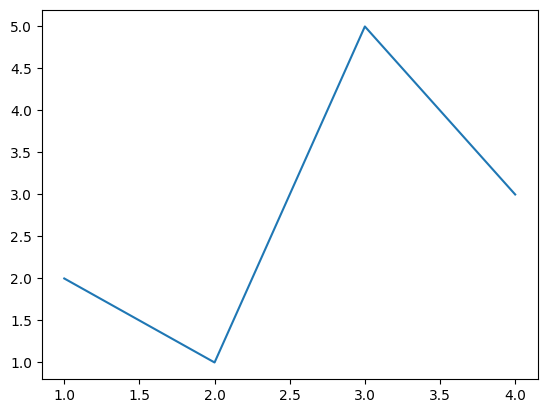

In [ ]:
# create a simple plot
X = np.array([1,2,3,4])
Y = np.array([2,1,5,3])

plt.plot(X,Y)
plt.show()

<Figure size 640x480 with 0 Axes>

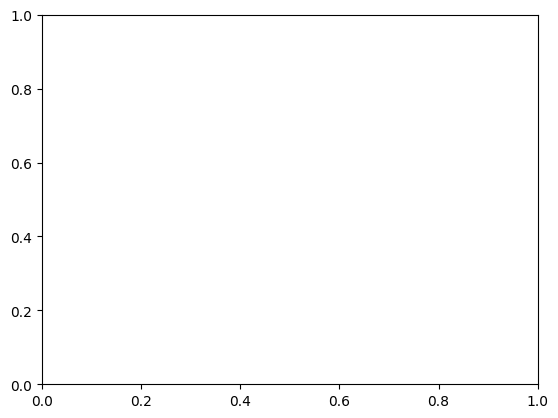

In [ ]:
# create subplots
fig = plt.figure() # create empty fig with no axes
fig, ax = plt.subplots() # a figure with a single axis
plt.show()

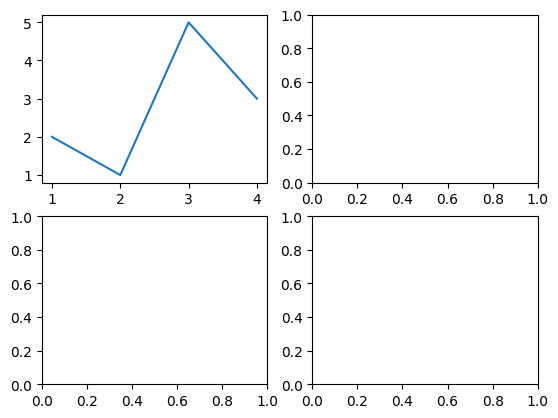

In [ ]:
fig, axs = plt.subplots(2,2) # a fig with 2x2 grid of axes
axs[0,0].plot(X,Y) # plot XY int the first corner of the grid
plt.show()

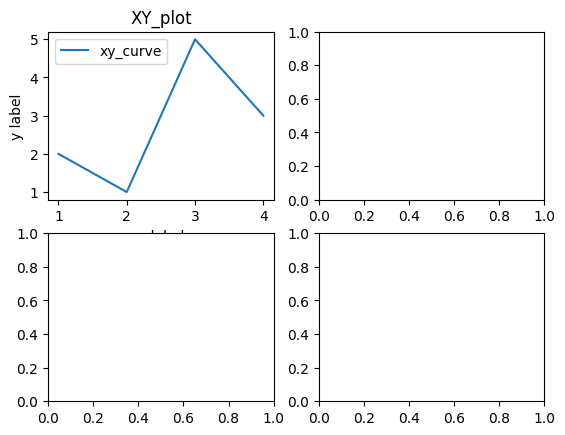

In [ ]:
# add some detail to the plot
fig, axs = plt.subplots(2, 2) # a figure with a 2x2 grid of Axes
axs[0,0].plot(X,Y, label='xy_curve')
axs[0,0].set_xlabel('x label') # set x axis label for subplot 1
axs[0,0].set_ylabel('y label')
axs[0,0].legend() # display legends
axs[0,0].set_title('XY_plot') # set title for subplot 1
plt.show()

# Task 01. Preliminary analysis of datasets
Provide a preliminary analysis of the california housing dataset based on your learning today

In [ ]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True).data # does .data stop the result value coming thru?
# without .data we get a bunch of other cvrap from the file i guess?

display(california_housing)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
california_housing.describe(include="all")

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [ ]:

california_housing.shape
# the dataset has 8 variables and 20640 observations


(20640, 8)

In [ ]:
# the mean age of a house is 29
round(california_housing.HouseAge.mean())

29

In [ ]:
# the oldest house is 52

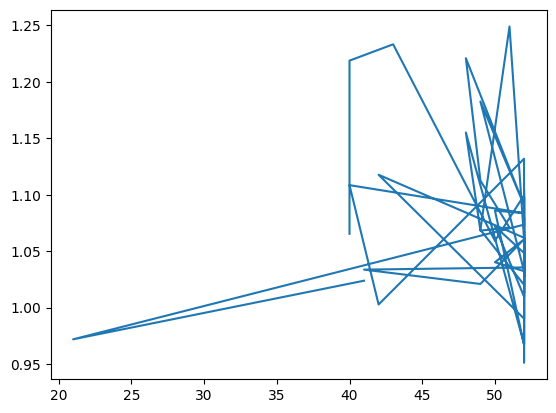

In [ ]:
# let's try plotting some stuff. house age an number of bedrooms
X = california_housing.HouseAge.head(50)
Y = california_housing.AveBedrms.head(50)

plt.plot(X,Y)
plt.show()

# ok it's a total mess lol
# anyway maybe do a bit more in the lab but this is all stuff from Firat's module if I really need to look at it

# Tutorial 04. Performance evaluation
`sklearn` provides various methods for evaluating the results of a model

In [ ]:
# calculate the accuracy of a model

import numpy as np
from sklearn.metrics import accuracy_score

y_true = [0,1,2,3]
y_pred = [0,2,1,3]
print(accuracy_score(y_true, y_pred))

# takes a set of labels and predicted labels and gives you a % accuracy - in this case 50%

0.5


In [ ]:
# compute the confusion matrix
from sklearn.metrics import confusion_matrix

y_true = [2,0,2,2,0,1]
y_pred = [0,0,2,2,0,2]
confusion_matrix(y_true, y_pred) # ew. not pretty to look at!!!


[[2 0 0]
 [0 0 1]
 [1 0 2]]


In [ ]:
# for binary problems we can look at true and false positives and negatives
y_true = [0,0,0,1,1,1,1,1]
y_pred=[0,1,0,1,0,1,0,1]

tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel() # ravel flattens the array

tn, fp, fn, tp # ew this is horrible to intepret, there must be a prettier option

(2, 1, 2, 3)

In [ ]:
# we can also calculate precision, recall and F1
from sklearn import metrics
y_true = [1,1,0,0]
y_pred = [1,1,1,1]

metrics.precision_score(y_true, y_pred) # how many items marked as positive were correctly identified

0.5

In [ ]:
metrics.recall_score(y_true, y_pred) # how many actual positives were marked as positive

1.0

In [ ]:
metrics.f1_score(y_true, y_pred) # harmonic mean of the above two metrics (reciprocal mean)

0.6666666666666666

In [ ]:
# we can get the ROC from sklearn and plot it

import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y = np.array([1,1,2,2]) # i think these are actual labels
scores = np.array([0.1, 0.4, 0.35, 0.8]) # i think these are confidence rates for a positive result?
fpr, tpr, thresholds = roc_curve(y, scores, pos_label=2)
print(fpr)
print(tpr)
print(thresholds)
auc_score = roc_auc_score(y, scores)
print(auc_score)


# tbh don't 100% follow this so probs ask in lab at some point

[0.  0.  0.5 0.5 1. ]
[0.  0.5 0.5 1.  1. ]
[1.8  0.8  0.4  0.35 0.1 ]
0.75


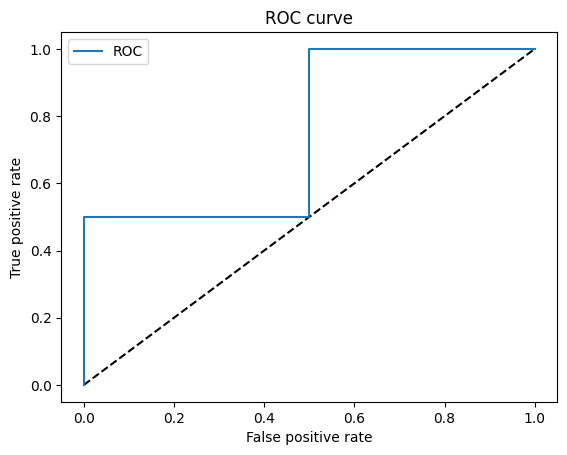

In [ ]:
from matplotlib import pyplot as plt
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
# calculate RMSE, MAE and R-squared
import numpy as np
from sklearn import metrics

y_true = [0, 1, 2, 4, 8]
y_pred = [0, 1, 3, 5, 7]

RMSE=np.sqrt(metrics.mean_squared_error(y_true,y_pred))
MAE=metrics.mean_absolute_error(y_true, y_pred)
R2=metrics.r2_score(y_true, y_pred)
#r2_score is not a symmetric function. Note the order of input.

print("RMSE =", RMSE)
print("MAE =", MAE)
print("R2 =", R2)

RMSE = 0.7745966692414834
MAE = 0.6
R2 = 0.925


# Task 02. Breast Cancer Dataset
Use the metrics to evaluate the logistic regression calculator predicting the binary class of each sample

In [1]:
# setup code
from sklearn.datasets import load_breast_cancer
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np

X, y = load_breast_cancer(return_X_y=True) # not exactly sure what return X_y is doing but I think it puts all the
# predictor variables in an array X abnd the outcome variables in an array y
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=0) # create train and test datasets at 80/20 split
lr=LogisticRegression(solver='lbfgs', max_iter=8000) # create a regressor
lr.fit(X_train,y_train) # train it on the training data
y_pred=lr.predict(X_test) # test it on the test data - predictions
y_conf=lr.predict_proba(X_test) # get confidence values for those predictions (I think)

In [2]:
# scratch
# so I think we want to check on y_test which is the og test data and y_pred which are the predictions based on X_test

In [3]:
# accuracy
import numpy as np
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred)) # wish I knew if this was right or not!

0.9473684210526315


In [9]:
# precision
from sklearn import metrics
precision = metrics.precision_score(y_test, y_pred)
print("precision =", precision)

precision = 0.9841269841269841


In [5]:
# recall
recall = metrics.recall_score(y_test, y_pred)
print("recall =", recall)

recall = 0.9253731343283582


In [8]:
# f1
f1 = metrics.f1_score(y_test, y_pred)
print("f1 =", f1)

f1 = 0.9538461538461538


In [7]:
# roc_curve
y = y_test
scores = y_conf[:,1] # y_conf gives confidence of negative and positive classification = i.e. they add up to 1, so we need the second column only

fpr, tpr, thresholds = roc_curve(y, scores) # why is this giving us 10 results? there are 114 values in y_test

print(fpr)
print(tpr)
print(thresholds) # don't really get what the thresholds are tbh....



NameError: name 'roc_curve' is not defined

In [ ]:
# lets plot it
from matplotlib import pyplot as plt
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
# auc
auc_score = roc_auc_score(y, scores)
print(auc_score)

# Task 03. California_housing dataset
Take the linear regression model for `median_house_value` and assess it with RMSE, MAE and R-squared metrics

In [ ]:
# setup code
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
#import dataset
california=fetch_california_housing() # this data imports differently, i guess this is why it uses a diff function
# probably worth expoloring if using other sklearn datasets
x=california["data"]
y=california["target"]
names=california["feature_names"]
#Dividing the data set and training set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=125)
# Build a linear regression model and train a test set
reg_linear = LinearRegression().fit (x_train, y_train)
y_pred_linear=reg_linear.predict(x_test)

In [ ]:
# RMSE
import numpy as np # do i rly need to import numpy one million times, probably not
from sklearn import metrics

# y_test is the true values, y_pred_linear is the predicted ones to test

RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred_linear))
print("RMSE =", RMSE)

RMSE = 0.7247057467641003


In [ ]:
# MAE
MAE = metrics.mean_absolute_error(y_test, y_pred_linear)
print("MAE =", MAE)

MAE = 0.5388109044335371


In [ ]:
# R-squared
R2 = metrics.r2_score(y_test, y_pred_linear)
print("R2 = ", R2)

R2 =  0.6149716055425611
